## import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

## Load the California Housing Dataset


#### This code loads the California Housing Dataset using scikit-learn's `fetch_california_housing` function and prints a brief description of the dataset using the `DESCR` attribute.


In [2]:
# Step 1: Load the California Housing Dataset
california_housing = fetch_california_housing()

# Display information about the dataset
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

##  :prepare the data

#### This code extracts the feature matrix (X) and target vector (y) from the California Housing Dataset, assigning them to variables for further data preparation and analysis.

In [3]:
## step2:prepare the data
X = california_housing.data
y = california_housing.target

## Split the data into training and testing sets
#### This code splits the dataset into training and testing sets using scikit-learn's `train_test_split` function. The feature matrix `X` and target vector `y` are divided into training sets (`X_train` and `y_train`) and testing sets (`X_test` and `y_test`). The parameter `test_size=0.2` indicates that 20% of the data is reserved for testing, and `random_state=42` ensures reproducibility by fixing the random seed.

In [4]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train the linear regression model
#### This code creates a linear regression model using scikit-learn's `LinearRegression` class and then trains the model on the training data (`X_train` and `y_train`) using the `fit` method. The variable `model` now holds the trained linear regression model, which can be used for making predictions.

In [5]:
#Step 4: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make predictions on the test set
#### This code uses the trained linear regression model (`model`) to make predictions on the test set features (`X_test`), and the predicted values are stored in the variable `y_pred_linear`.


In [6]:
# Step 5: Make predictions on the test set
y_pred_linear = model.predict(X_test)

## Evaluate the model

#### This code evaluates the performance of the linear regression model by calculating the Mean Squared Error (MSE) between the actual target values (`y_test`) and the predicted values (`y_pred_linear`). The result is then printed to assess the model's accuracy.

In [7]:
# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5558915986952422


## visualise results using scatter plot

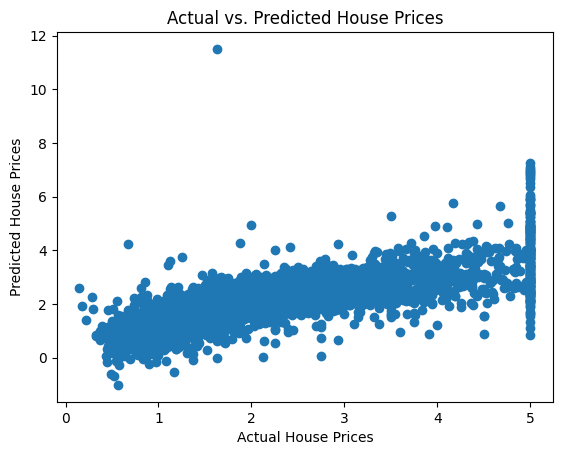

In [8]:
# Step 7: Visualize the results
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()


## This code calculates the coefficient of determination (R-squared) value for a linear regression model's predictions.

In [9]:
# R2
r2 = r2_score(y_test, y_pred_linear)
print("R2 --> ", r2)

R2 -->  0.5757877060324524


## Lasso regularization applied with adjustable alpha parameter to predict test data.

In [10]:
# Step 6: Apply L1 (Lasso) regularization
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

## Evaluate the Lasso model

In [11]:
# Step 7: Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')

Lasso Regression - Mean Squared Error: 0.544449158124652



## This code calculates the coefficient of determination (R-squared) value for a linear regression model's predictions.

In [12]:
# R2
r2 = r2_score(y_test, y_pred_lasso)
print("R2 --> ", r2)

R2 -->  0.5845196673976367


## Ridge regression with alpha=0.01 applied on training data, predicting test data. 

In [13]:
# Step 6: Apply L2 (Ridge) regularization
ridge_model = Ridge(alpha=0.01)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

## Evaluate the Ridge model

In [14]:
# Step 7: Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')

Ridge Regression - Mean Squared Error: 0.55589071394375


## Elastic Net regularization with adjustable alpha and l1_ratio parameters predicting test data.

In [15]:
# Step 6: Apply Elastic Net regularization
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.6)  # You can adjust the alpha and l1_ratio parameters
elastic_net_model.fit(X_train, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test)

## Evaluate the Elastic Net model

In [16]:
# Step 7: Evaluate the Elastic Net model
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print(f'Elastic Net Regression - Mean Squared Error: {mse_elastic_net}')

Elastic Net Regression - Mean Squared Error: 0.5453577818272314


## This code creates a figure with four subplots, each representing a different type of regression model: Linear Regression, Lasso Regression, Ridge Regression, and Elastic Net Regression. 

#### Each subplot displays a scatter plot comparing the actual house prices (`y_test`) against the predicted house prices generated by the respective regression model. 

#### The `plt.scatter` function is used to create the scatter plots, and `plt.subplot` is used to arrange the subplots in a 2x2 grid. 

#### Finally, `plt.tight_layout()` ensures that the subplots are properly spaced, and `plt.show()` displays the figure.

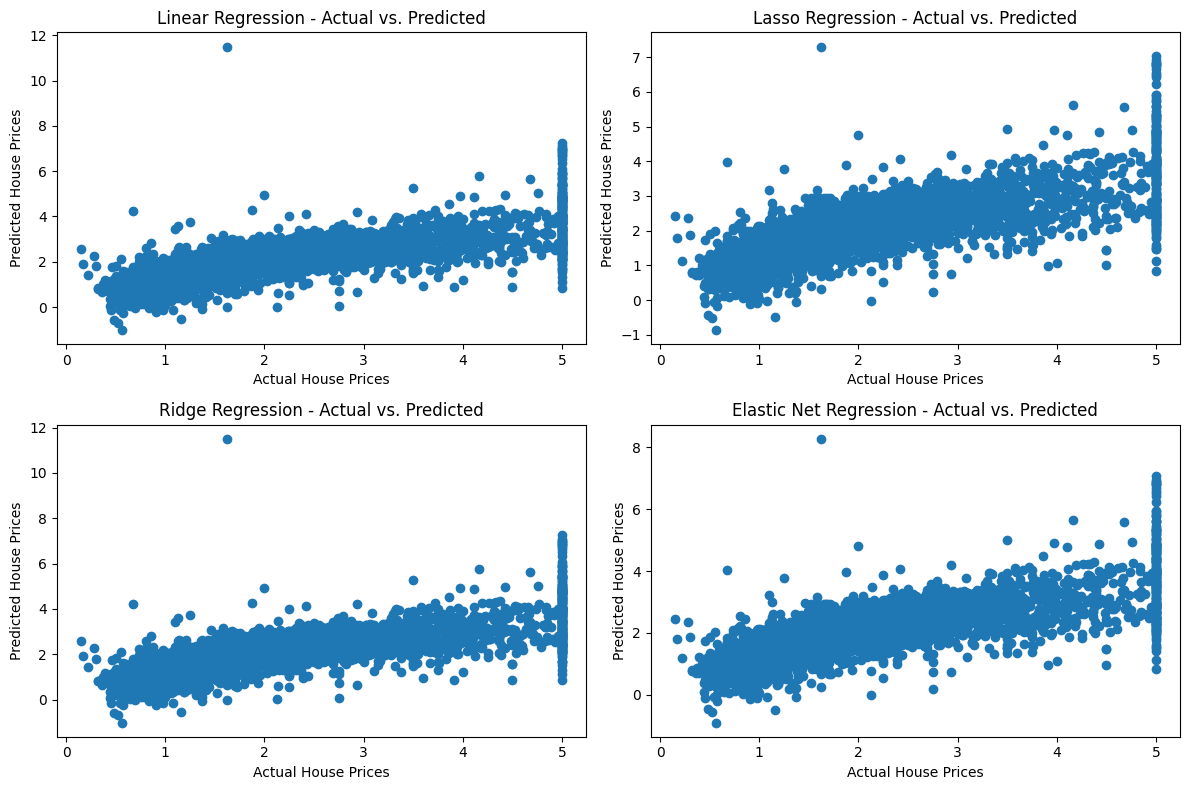

In [17]:

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')

plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_lasso)
plt.title('Lasso Regression - Actual vs. Predicted')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')

plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_ridge)
plt.title('Ridge Regression - Actual vs. Predicted')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')

plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_elastic_net)
plt.title('Elastic Net Regression - Actual vs. Predicted')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')

plt.tight_layout()
plt.show()